In [3]:
from joblib import dump, load
import numpy as np
# Load model
model = load('Model.joblib') 

categories = ['Cold Thermal', 'Electro-chemical', 'Electro-mechanical', 'Flow Battery'
 'Hot Thermal', 'Lead Battery', 'Lithium Battery', 'Pumped Hydro Storage',
 'Sodium Battery']

In [11]:
# Format of input X:
# [Rated Power (kW), Duration (hours), Elevation (m), Elevation Difference (m), Max Temp (C), 
# Min Temp (C), Average Temp (C)]

# Change the values below as necessary
rated_power = 7200
duration = 0.1
elevation_difference = 70
max_temperature = 30
min_temperature = 20
average_temperature = 25

In [12]:
X = np.array([[rated_power,duration,elevation_difference,max_temperature,min_temperature,average_temperature]])

In [13]:
print('The predicted type of ESS to use for this application is: ',categories[model.predict(X)[0]])

The predicted type of ESS to use for this application is:  Sodium Battery


Run predictions for 11 common applications

In [2]:
# Default values, median from training set
elevation_difference = 13.3
max_temperature = 20.7
min_temperature = 2.9
average_temperature = 11.8

In [25]:
applications = np.array([[250.5  , 0.5],
                         [250.5  , 4.0],
                         [55     , 5.0],
                         [50.5   , 2.5],
                         [5.25   , 2.5],
                         [5.05   , 0.1264],
                         [0.50005, 3.5],
                         [5.025  , 2.5],
                         [0.0035 , 3.0],
                         [0.525  , 3.5],
                         [0.5    , 3.0]])

applications = np.hstack((applications, 
                          np.ones((len(applications),1))*elevation_difference,
                          np.ones((len(applications),1))*max_temperature,
                          np.ones((len(applications),1))*min_temperature,
                          np.ones((len(applications),1))*average_temperature))

applications[:,0] = applications[:,0]*1000 # MW to kW
print(applications)

[[2.5050e+05 5.0000e-01 7.0000e+01 3.0000e+01 2.0000e+01 2.5000e+01]
 [2.5050e+05 4.0000e+00 7.0000e+01 3.0000e+01 2.0000e+01 2.5000e+01]
 [5.5000e+04 5.0000e+00 7.0000e+01 3.0000e+01 2.0000e+01 2.5000e+01]
 [5.0500e+04 2.5000e+00 7.0000e+01 3.0000e+01 2.0000e+01 2.5000e+01]
 [5.2500e+03 2.5000e+00 7.0000e+01 3.0000e+01 2.0000e+01 2.5000e+01]
 [5.0500e+03 1.2640e-01 7.0000e+01 3.0000e+01 2.0000e+01 2.5000e+01]
 [5.0005e+02 3.5000e+00 7.0000e+01 3.0000e+01 2.0000e+01 2.5000e+01]
 [5.0250e+03 2.5000e+00 7.0000e+01 3.0000e+01 2.0000e+01 2.5000e+01]
 [3.5000e+00 3.0000e+00 7.0000e+01 3.0000e+01 2.0000e+01 2.5000e+01]
 [5.2500e+02 3.5000e+00 7.0000e+01 3.0000e+01 2.0000e+01 2.5000e+01]
 [5.0000e+02 3.0000e+00 7.0000e+01 3.0000e+01 2.0000e+01 2.5000e+01]]


In [26]:
results = model.predict_proba(applications)

In [33]:
np.savetxt('Prediction of technical suitability.csv', results, delimiter=',')

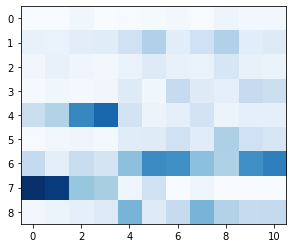

In [29]:
import matplotlib.pyplot as plt
plt.imshow(results.T, cmap=plt.cm.Blues)